# 추측통계의 기본

## 모집단과 표본

### 표본의 추출방법

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [2]:
df = pd.read_csv('./datasets/scores400.csv')
scores = np.array(df['score'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80], dtype=int64)

In [3]:
np.random.choice([1, 2, 3], 3)

array([3, 2, 1])

In [4]:
np.random.choice([1, 2, 3], 3, replace=False)

array([1, 3, 2])

In [5]:
np.random.seed(0)
np.random.choice([1, 2, 3], 3)

array([1, 2, 1])

In [6]:
np.random.seed(0)
sample = np.random.choice(scores, 20)

sample.mean()

70.400

In [7]:
scores.mean()

69.530

In [8]:
for i in range(5):
    sample = np.random.choice(scores, 20)
    print(f'{i+1}번째 무작위 추출로 얻은 표본평균', sample.mean())

1번째 무작위 추출로 얻은 표본평균 72.45
2번째 무작위 추출로 얻은 표본평균 63.7
3번째 무작위 추출로 얻은 표본평균 66.05
4번째 무작위 추출로 얻은 표본평균 71.7
5번째 무작위 추출로 얻은 표본평균 74.15


## 확률 모델

### 확률의 기본

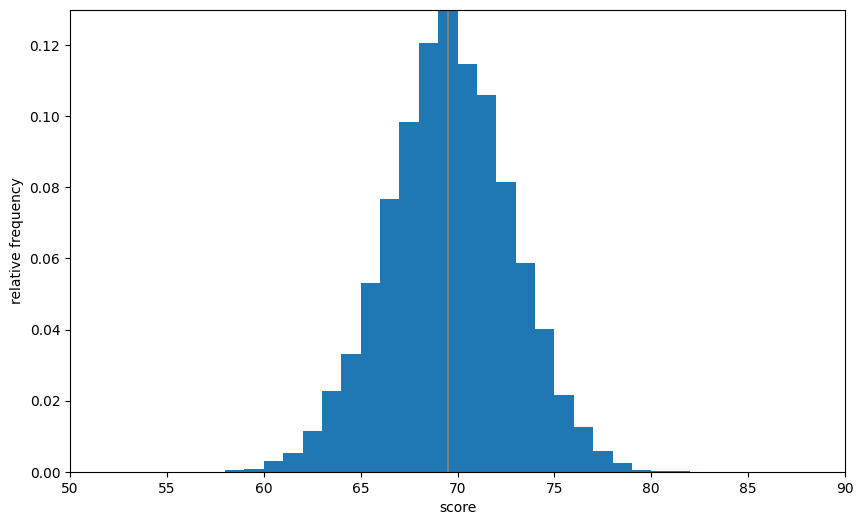

In [9]:
sample_means = [np.random.choice(scores, 20).mean()
                for _ in range(10000)]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample_means, bins=100, range=(0, 100), density=True)
# 모평균을 세로선으로 표시
ax.vlines(np.mean(scores), 0, 1, 'gray')
ax.set_xlim(50, 90)
ax.set_ylim(0, 0.13)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

In [10]:
A=set([1, 2, 3, 3, 2])  # 중복된 자료는 없어진다.
print(A)

B= frozenset(['H', 'T'])
print(B)

C={"\u2660", "\u2661", "\u2662", "\u2663"}
print(C)

print(type(C))

{1, 2, 3}
frozenset({'T', 'H'})
{'♣', '♠', '♡', '♢'}
<class 'set'>


In [11]:
A1 = set([1, 2, 3, 4])
A2 = set([2, 4, 6])
A3 = set([1, 2, 3])
A4 = set([2, 3, 4, 5, 6])

print(A1.union(A2))
print(A2 | A1)
print(A3.intersection(A4))
print(A4 & A3)

{1, 2, 3, 4, 6}
{1, 2, 3, 4, 6}
{2, 3}
{2, 3}


In [12]:
print(A3.issubset(A1))
print(A3 <= A1)
print(A3.issubset(A2))
print(A3 <= A2)
print(A3 <= A3)  # 모든 집합은 자기 자신의 부분집합이다.
print(A3 < A3)  # 모든 집합은 자기 자신의 진부분집합이 아니다.

True
True
False
False
True
False


In [13]:
print(A1.difference(A2))
print(A1 - A2)

{1, 3}
{1, 3}


In [14]:
empty_set = set([])
print(empty_set)
print(empty_set < A1)
print(empty_set.intersection(A1))
print(empty_set.union(A1))

set()
True
set()
{1, 2, 3, 4}


# 확률

In [1]:
pip install pgmpy

  Using cached pgmpy-0.1.25-py3-none-any.whl.metadata (6.4 kB)
Using cached pgmpy-0.1.25-py3-none-any.whl (2.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
from pgmpy.factors.discrete import JointProbabilityDistribution as JPD

px = JPD(['X'], [2], np.array([12, 8]) / 20)
print(px)

py = JPD(['Y'], [2], np.array([12, 8]) / 20)
print(py)

+------+--------+
| X    |   P(X) |
+======+========+
| X(0) | 0.6000 |
+------+--------+
| X(1) | 0.4000 |
+------+--------+
+------+--------+
| Y    |   P(Y) |
+======+========+
| Y(0) | 0.6000 |
+------+--------+
| Y(1) | 0.4000 |
+------+--------+


In [2]:
pxy = JPD(['X', 'Y'], [2, 2], np.array([3, 9, 7, 1]) / 20)
print(pxy)

+------+------+----------+
| X    | Y    |   P(X,Y) |
+======+======+==========+
| X(0) | Y(0) |   0.1500 |
+------+------+----------+
| X(0) | Y(1) |   0.4500 |
+------+------+----------+
| X(1) | Y(0) |   0.3500 |
+------+------+----------+
| X(1) | Y(1) |   0.0500 |
+------+------+----------+


In [3]:
py_on_x0 = pxy.conditional_distribution([('X', 0)], inplace=False)  # 사건 A에 대한 조건부확률
print(py_on_x0)

py_on_x1 = pxy.conditional_distribution([('X', 1)], inplace=False)
print(py_on_x1)

px_on_y0 = pxy.conditional_distribution([('Y', 0)], inplace=False)  # 사건 B에 대한 조건부확률
print(px_on_y0)

+------+--------+
| Y    |   P(Y) |
+======+========+
| Y(0) | 0.2500 |
+------+--------+
| Y(1) | 0.7500 |
+------+--------+
+------+--------+
| Y    |   P(Y) |
+======+========+
| Y(0) | 0.8750 |
+------+--------+
| Y(1) | 0.1250 |
+------+--------+
+------+--------+
| X    |   P(X) |
+======+========+
| X(0) | 0.3000 |
+------+--------+
| X(1) | 0.7000 |
+------+--------+


In [4]:
from pgmpy.factors.discrete import TabularCPD

cpd_X = TabularCPD('X', 2, [[1 - 0.002], [0.002]])
print(cpd_X)

+------+-------+
| X(0) | 0.998 |
+------+-------+
| X(1) | 0.002 |
+------+-------+


In [5]:
cpd_Y_on_X = TabularCPD('Y', 2, np.array([[0.95, 0.01], [0.05, 0.99]]),
                        evidence=['X'], evidence_card=[2])
print(cpd_Y_on_X)

+------+------+------+
| X    | X(0) | X(1) |
+------+------+------+
| Y(0) | 0.95 | 0.01 |
+------+------+------+
| Y(1) | 0.05 | 0.99 |
+------+------+------+


In [6]:
from pgmpy.models import BayesianModel

model = BayesianModel([('X', 'Y')])
model.add_cpds(cpd_X, cpd_Y_on_X)
model.check_model()

True

In [7]:
from pgmpy.inference import VariableElimination

inference = VariableElimination(model)
posterior = inference.query(['X'], evidence={'Y': 1})
print(posterior)

+------+----------+
| X    |   phi(X) |
+======+==========+
| X(0) |   0.9618 |
+------+----------+
| X(1) |   0.0382 |
+------+----------+


### Question 1

In [8]:
display(np.random.choice([1, 2, 3], 3))

display(np.random.choice([1, 2, 3], 3, replace=False))

array([1, 2, 1])

array([1, 3, 2])

### Question 2

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/kznetwork/DataAnalysis/main/datasets/scores400.csv')
df

,score
0,76
1,55
2,80
3,80
4,74
...,...
395,77
396,60
397,83
398,80


In [12]:
scores = np.array(df['score'])
display(scores[:10])

# 복원 추출 (With Replacement)
sample_with_replacement = np.random.choice(scores, 10, replace=True)
print("복원 추출 (With Replacement):", sample_with_replacement)

# 비복원 추출 (Without Replacement)
sample_without_replacement = np.random.choice(scores, 10, replace=False)
print("비복원 추출 (Without Replacement):", sample_without_replacement)

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80], dtype=int64)

복원 추출 (With Replacement): [68 62 49 82 49 73 69 52 69 85]
비복원 추출 (Without Replacement): [49 86 45 55 63 60 76 77 58 86]


### Question 3

In [13]:
A = set([1,3,5])
B = set([1,2,3])
C = set([2,4,6])
A | ( B & C) == (A | B) & (A | C)

True

In [14]:
A & ( B | C) == (A & B) | (A & C)

True

### Question 4

In [15]:
P = {}
P[frozenset('A')] = 70 / 100
P[frozenset('O')] =  30 / 70
P

{frozenset({'A'}): 0.700, frozenset({'O'}): 0.429}

### Question 5

In [16]:
from pgmpy.factors.discrete import TabularCPD
import numpy as np

# 정정된 조건부 확률 분포 값을 정의합니다.
values = np.array([[1 - 0.002], [0.002]])

# TabularCPD 객체를 수정된 값으로 생성합니다.
cpd_X = TabularCPD('X', 2, values.tolist())
print(cpd_X)

+------+-------+
| X(0) | 0.998 |
+------+-------+
| X(1) | 0.002 |
+------+-------+


In [17]:
cpd_Y_on_X = TabularCPD('Y', 2, np.array([[0.95, 0.01], [0.05, 0.99]]),
                        evidence=['X'], evidence_card=[2])
print(cpd_Y_on_X)

+------+------+------+
| X    | X(0) | X(1) |
+------+------+------+
| Y(0) | 0.95 | 0.01 |
+------+------+------+
| Y(1) | 0.05 | 0.99 |
+------+------+------+


In [18]:
from pgmpy.models import BayesianModel

model = BayesianModel([('X', 'Y')])
model.add_cpds(cpd_X, cpd_Y_on_X)
model.check_model()

True

In [19]:
from pgmpy.inference import VariableElimination

# 'model'에는 Bayesian Network 모델이 정의되어 있어야 합니다.

inference = VariableElimination(model)
posterior = inference.query(['X'], evidence={'Y': 1})
print(posterior.values)

[0.962 0.038]
